# Diminos Store - Delivery Time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dd = pd.read_csv("/content/diminos_data.csv")
dd

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [3]:
dd.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [15]:
missing_values = dd.isnull().sum()
missing_percentage = (dd.isnull().sum() / len(dd)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print("Missing Value Information:")
print(missing_info.to_markdown())

Missing Value Information:
|                       |   Missing Count |   Missing Percentage (%) |
|:----------------------|----------------:|-------------------------:|
| order_id              |               0 |                        0 |
| order_placed_at       |               0 |                        0 |
| order_delivered_at    |               0 |                        0 |
| delivery_time_minutes |               0 |                        0 |
| hour                  |               0 |                        0 |
| day_of_week           |               0 |                        0 |


In [7]:
dd['order_placed_at'] = pd.to_datetime(dd['order_placed_at'])
dd['order_delivered_at'] = pd.to_datetime(dd['order_delivered_at'])
dd['delivery_time_minutes'] = (dd['order_delivered_at'] - dd['order_placed_at']).dt.total_seconds() / 60
dd.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_minutes
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [8]:
delivery_stats = dd['delivery_time_minutes'].describe()
pct_95 = dd['delivery_time_minutes'].quantile(0.95)

print("Descriptive Statistics for Delivery Time (minutes):\n", delivery_stats)
print(f"\n95th Percentile of Delivery Time: {pct_95:.2f} minutes")

Descriptive Statistics for Delivery Time (minutes):
 count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_minutes, dtype: float64

95th Percentile of Delivery Time: 27.26 minutes


In [9]:
delivery_promise = 31
orders_exceeding_promise = dd[dd['delivery_time_minutes'] > delivery_promise]
num_exceeding = len(orders_exceeding_promise)
percentage_exceeding = (num_exceeding / len(dd)) * 100

print(f"Number of orders exceeding {delivery_promise}-minute delivery promise: {num_exceeding}")
print(f"Percentage of orders exceeding {delivery_promise}-minute delivery promise: {percentage_exceeding:.2f}%")

Number of orders exceeding 31-minute delivery promise: 557
Percentage of orders exceeding 31-minute delivery promise: 3.71%


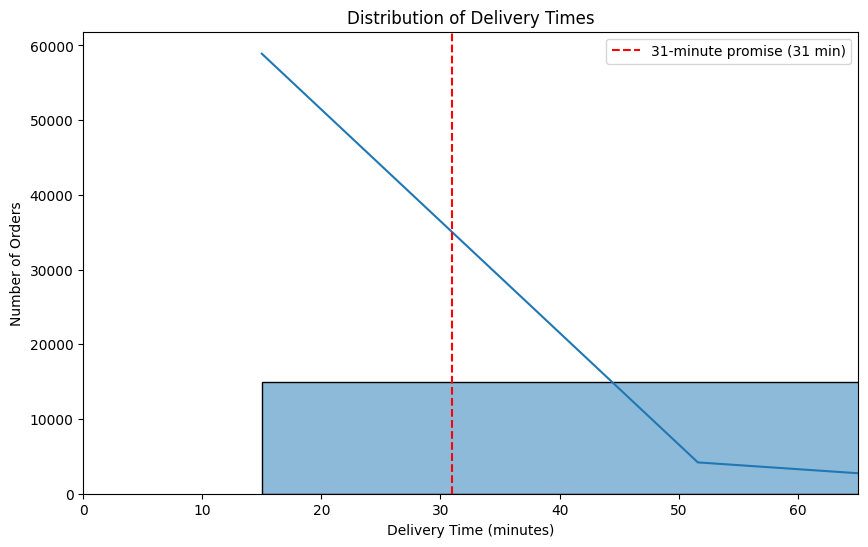

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(dd['delivery_time_minutes'], bins=50, kde=True)
plt.axvline(x=delivery_promise, color='r', linestyle='--', label=f'31-minute promise ({delivery_promise} min)')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Number of Orders')
plt.legend()
plt.xlim(0, dd['delivery_time_minutes'].quantile(0.99))
plt.show()

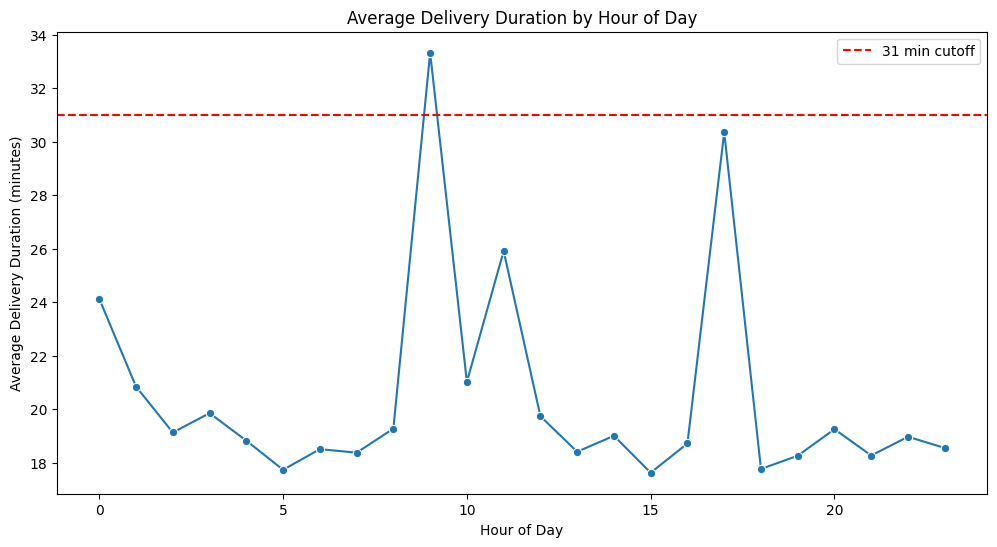

In [11]:
dd['hour'] = dd['order_placed_at'].dt.hour
avg_by_hour = dd.groupby('hour')['delivery_time_minutes'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_by_hour.index, y=avg_by_hour.values, marker='o')
plt.axhline(31, color='red', linestyle='--', label='31 min cutoff')
plt.title("Average Delivery Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Delivery Duration (minutes)")
plt.legend()
plt.show()

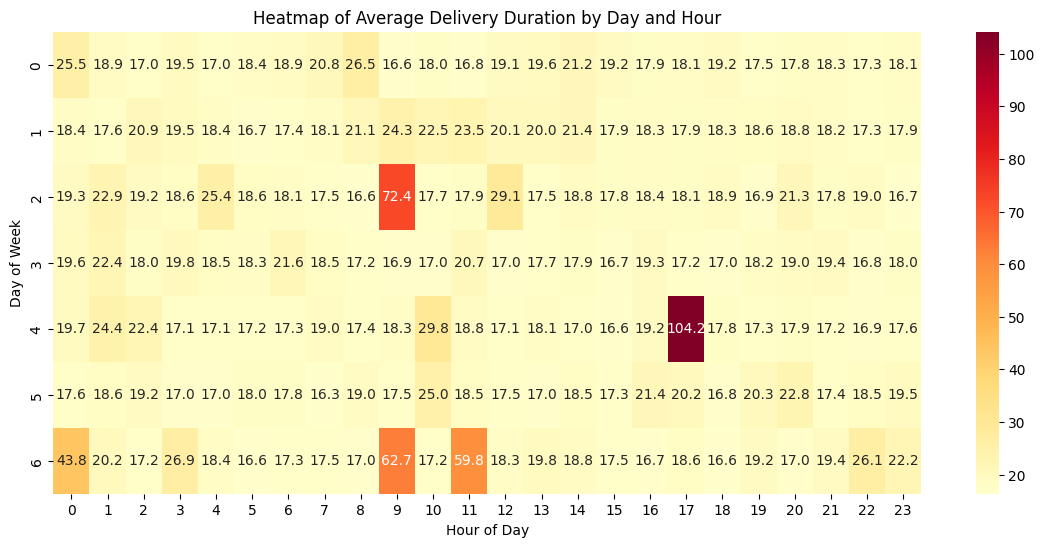

In [12]:
dd['day_of_week'] = dd['order_placed_at'].dt.dayofweek
pivot_table = dd.pivot_table(values='delivery_time_minutes', index='day_of_week', columns='hour', aggfunc='mean')
plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Heatmap of Average Delivery Duration by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()